# NER CRF Assignment // Syntactic Processing (NLP)
---

By: Abhishek Singh (aulakh.abhishek@gmail.com)

## Identifying Entities in Healthcare Data

##Workspace set up: Import and Install useful packages.

In [ ]:
#Basic Import
import numpy as np
import pandas as pd  
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_colwidth', 1000)

In [184]:
# Import of spacy library for advanced modelling using text data
import spacy
model = spacy.load("en_core_web_sm")

##Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line. 
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

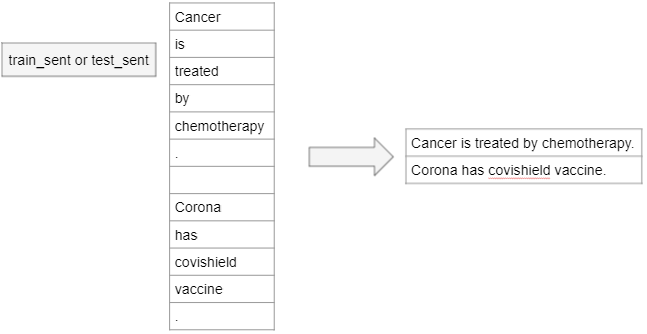

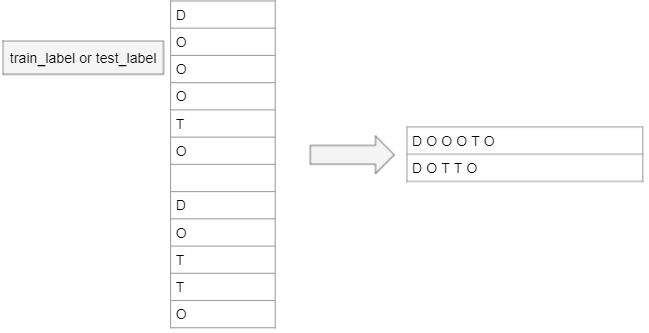

- Mount the Google Drive to access train and test dataset 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/ML/NLP/'
print(root_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive/My Drive/ML/NLP/



- Defining the paths to train and test dataset.

In [ ]:
train_data_filepath = root_path + '/train_sent'
train_label_filepath = root_path + '/train_label'

test_data_filepath = root_path + '/test_sent'
test_label_filepath = root_path + '/test_label'

- Function to read in the files, strip the '/n' character and then combine the rows into single string seperated on word-boundary of empty line. 

In [ ]:
def joinWordsAndLables(filepath):
  f = open(filepath, 'r')                                        # Open in the file read mode
  df = pd.DataFrame(f.read().splitlines(), columns=['word'])     # Read file into df after stripping '\n' character. 
  df['sent_code'] = ( df['word'] == '').cumsum()                 # Assign sentence code to each word 
  df = df[df['word'] != '']                                      # Remove the blank lines to join the words using sent code
  g = df.groupby('sent_code')                                    # Using Groupby combine the words with same sent code
  dataset = pd.DataFrame(g.apply(lambda x: " ".join(x.word)), columns=['sentence'])   # Finally joining together the words into sentences having same sent code

  return dataset

- Read in train and test data to for Sentences & corrosponding single string NER tags 

In [ ]:
train_data = joinWordsAndLables(train_data_filepath)
train_labels = joinWordsAndLables(train_label_filepath)

test_data = joinWordsAndLables(test_data_filepath)
test_labels = joinWordsAndLables(test_label_filepath)

- Let's try validate the training data and labels

In [ ]:
train_data.head()

,sentence
sent_code,
0,"All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )"
1,"The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )"
2,"Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )"
3,"The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )"
4,"Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )"


In [ ]:
train_labels.head()

,sentence
sent_code,
0,O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
1,O O O O O O O O O O O O O O O O O O O O O O O O O
2,O O O O O O O O O O O O O O O
3,O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
4,O O O O O O O O O O O O O O O O O O O O O O


- Next we will try to merge data and labels together in train and test set 

In [ ]:
train = pd.merge(train_data,train_labels,how='inner',on='sent_code',suffixes=('_data', '_label'))
test = pd.merge(test_data,test_labels,how='inner',on='sent_code',suffixes=('_data', '_label'))

- As required, We need to print the first 5 sentences which were constructed by combining the words.
- Below shows first and last five sentences along with their NER labels for both train and test data seperately.

In [ ]:
train

,sentence_data,sentence_label
sent_code,,
0,"All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )",O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
1,"The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )",O O O O O O O O O O O O O O O O O O O O O O O O O
2,"Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )",O O O O O O O O O O O O O O O
3,"The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )",O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
4,"Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )",O O O O O O O O O O O O O O O O O O O O O O
...,...,...
2594,Special report : comparative efficacy of different types of pneumatic compression pumps for the treatment of lymphedema,O O O O O O O O O T T T O O O O D
2595,Special report : pressure-reducing support surfaces in the prevention and treatment of pressure ulcers : group 1 technologies,O O O T T T O O O O O O D D O O O O
2596,External counterpulsation for treatment of chronic stable angina pectoris,T T O O O D D D D


In [ ]:
test

,sentence_data,sentence_label
sent_code,,
0,"Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )",O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
1,"As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration",O O O O O O O O O O O O O O O O O O O
2,The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period,O O O O O O O O O O O O O O O O O O O O O O O O
3,"There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )",O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
4,Fluctuations in ambient temperature are inversely correlated to changes in AFI,O O O O O O O O O O O
...,...,...
1051,Reduction of vasoreactivity and thrombogenicity with laser-thermal angioplasty : comparison with balloon angioplasty,O O D O D O T T O O O T T
1052,Effects of ultrasound energy on total peripheral artery occlusions : initial angiographic and angioscopic results .,O O T T O D D D D O O O O O O O
1053,High-dose chemotherapy with autologous stem-cell support for epithelial ovarian cancer,T T T T T T O D D D


### Count the number of sentences in the processed train and test dataset 

In [ ]:
print('Number of sentences in training dataset are ',len(train_data))
print('Number of sentences in test dataset are ',len(test_data))

Number of sentences in training dataset are  2599
Number of sentences in test dataset are  1056


- There are 2599 & 1056 sentences in training & test dataset respectively 

### Count the number of lines of labels in the processed train and test dataset.

In [ ]:
print('Number of labels / NER tags in training dataset are ',len(train_labels))
print('Number of labels / NER tags in test dataset are ',len(test_labels))

Number of labels / NER tags in training dataset are  2599
Number of labels / NER tags in test dataset are  1056


- There are 2599 & 1056 labels (NER tags) in training & test dataset respectively, which are same as number of sentences. 

##Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging. 



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

- We will first concatenate train & test data with labels to create a corpus of entire data

In [ ]:
corpus = pd.concat([train, test],ignore_index=True)
corpus

,sentence_data,sentence_label
0,"All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practi...",O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
1,"The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )",O O O O O O O O O O O O O O O O O O O O O O O O O
2,"Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )",O O O O O O O O O O O O O O O
3,"The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )",O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
4,"Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )",O O O O O O O O O O O O O O O O O O O O O O
...,...,...
3650,Reduction of vasoreactivity and thrombogenicity with laser-thermal angioplasty : comparison with balloon angioplasty,O O D O D O T T O O O T T
3651,Effects of ultrasound energy on total peripheral artery occlusions : initial angiographic and angioscopic results .,O O T T O D D D D O O O O O O O
3652,High-dose chemotherapy with autologous stem-cell support for epithelial ovarian cancer,T T T T T T O D D D
3653,`` Tandem '' high-dose chemoradiotherapy with autologous stem-cell support in the treatment of newly diagnosed or responsive multiple myeloma,T T T T T T T T T O O O O O O O O D D


- Next we will process the text in the corpus and pass it through spacy to process the tokens which have POS tag of 'NOUN' or 'PROPN'
- The nouns and text list will be used to extract the token,lemma and pos tag. 
- Then these three lists will be merged into a datframe 

In [ ]:
from tqdm import tqdm
pos = []
lemma = []
text = []
nouns = []

for rec in tqdm(corpus['sentence_data']):
  doc = model(rec)
  for tok in doc:
    if (tok.pos_ == 'NOUN') or (tok.pos_ == 'PROPN'):
      nouns.append(tok.pos_)
      text.append(tok.text)
      lemma.append(tok.lemma_)

# Appened the text & pos tags into a dataframe 
noun_table = pd.DataFrame({'WORD':text,'LEMMA':lemma,'POS':nouns})
noun_table

100%|██████████| 3655/3655 [00:35<00:00, 104.30it/s]


,WORD,LEMMA,POS
0,births,birth,NOUN
1,weeks,week,NOUN
2,University,University,PROPN
3,Vermont,Vermont,PROPN
4,n,n,PROPN
...,...,...,...
24322,support,support,NOUN
24323,treatment,treatment,NOUN
24324,myeloma,myeloma,NOUN
24325,globulin,globulin,NOUN


### Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [ ]:
# Print out the top 25 most common words (in their original form i.e lemma) with thier frequency 
pd.DataFrame(noun_table['LEMMA'].value_counts().nlargest(25))

,LEMMA
patient,561
treatment,314
%,247
cancer,219
study,219
cell,201
therapy,182
effect,181
disease,161
case,131


## Defining features for CRF





In [ ]:
# Let's define the features to get the feature value for one word.
def getFeaturesForWord(sentence, pos):
  word = sentence[pos]

  features = [
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[-2:]=' + word[-2:],     # last two characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'words.startsWithCapital=%s' % word[0].isupper() # is the word starting with a capital letter
  ]

  if(pos > 0):
    prev_word = sentence[pos-1]
    features.extend([
    'prev_word.lower=' + prev_word.lower(), 
    'prev_word.isupper=%s' % prev_word.isupper(),
    'prev_word.isdigit=%s' % prev_word.isdigit(),
    'prev_words.startsWithCapital=%s' % prev_word[0].isupper()
  ])
  else:
    features.append('START') # feature to track begin of sentence 

  if(pos == len(sentence)-1):
    features.append('END') # feature to track end of sentence

  return features

## Getting the features

### Write a code/function to get the features for a sentence

In [ ]:
# Define a function to get features for a sentence  using the 'getFeaturesForWord' function.
def getFeaturesForSentence(sentence):
  sentence_list = sentence.split()
  return [getFeaturesForWord(sentence_list, pos) for pos in range(len(sentence_list))]

- Let's pick the first sentence from the trainig data and get the features for all the words

In [ ]:
train_data['sentence'][0]

'All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )'

In [ ]:
# Apply function 'getFeaturesForSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = train_data['sentence'][0]
print(example_sentence)

features = getFeaturesForSentence(example_sentence)
features

All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )


[['word.lower=all',
  'word[-3:]=All',
  'word[-2:]=ll',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=True',
  'START'],
 ['word.lower=live',
  'word[-3:]=ive',
  'word[-2:]=ve',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=False',
  'prev_word.lower=all',
  'prev_word.isupper=False',
  'prev_word.isdigit=False',
  'prev_words.startsWithCapital=True'],
 ['word.lower=births',
  'word[-3:]=ths',
  'word[-2:]=hs',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=False',
  'prev_word.lower=live',
  'prev_word.isupper=False',
  'prev_word.isdigit=False',
  'prev_words.startsWithCapital=False'],
 ['word.lower=>',
  'word[-3:]=>',
  'word[-2:]=>',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=False',
  'prev_word.lower=births',
  'prev_word.isupper=False',
  'prev_word.isdigit=False',
  'prev_words.startsWithCapital=False'],
 ['word.lower=or',
  'word[-3:]=or',
  'word[-2:]=or',


### Write a code/function to get the labels of a sentence

In [ ]:
# Define a function to get the labels for a sentence.
def getLabelsForSentence(labels):
  return labels.split()

## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset 

In [ ]:
X_train = [getFeaturesForSentence(sentence) for sentence in list(train_data['sentence'])]
X_test = [getFeaturesForSentence(sentence) for sentence in list(test_data['sentence'])]

### Define the labels as the target variable for test and the train dataset

In [ ]:
y_train = [getLabelsForSentence(labels) for labels in list(train_labels['sentence'])]
y_test = [getLabelsForSentence(labels) for labels in list(test_labels['sentence'])]

## Build the CRF Model

- In order to avoid the error crfsuite for missing 'keep_tempfile' attribute during model training, We will be installing an older version of skelearn

In [ ]:
!pip install sklearn-crfsuite

     |████████████████████████████████| 743 kB 8.5 MB/s 


In [ ]:
#!pip install pycrf
!pip install -U 'scikit-learn<0.24'

     |████████████████████████████████| 6.8 MB 5.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


## Model training

In [ ]:
# Build the CRF model.
import sklearn
import sklearn_crfsuite
from sklearn_crfsuite import metrics

crf = sklearn_crfsuite.CRF(algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True)
crf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)

## Evaluation

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [ ]:
# Calculate the f1 score using the test data
y_pred = crf.predict(X_test)

In [ ]:
results = pd.DataFrame({'test_text':X_test,'test_label':y_test,'test_pred':y_pred})
results

,test_text,test_label,test_pred
0,"[[word.lower=furthermore, word[-3:]=ore, word[-2:]=re, word.isupper=False, word.isdigit=False, words.startsWithCapital=True, START], [word.lower=,, word[-3:]=,, word[-2:]=,, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=furthermore, prev_word.isupper=False, prev_word.isdigit=False, prev_words.startsWithCapital=True], [word.lower=when, word[-3:]=hen, word[-2:]=en, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=,, prev_word.isupper=False, prev_word.isdigit=False, prev_words.startsWithCapital=False], [word.lower=all, word[-3:]=all, word[-2:]=ll, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=when, prev_word.isupper=False, prev_word.isdigit=False, prev_words.startsWithCapital=False], [word.lower=deliveries, word[-3:]=ies, word[-2:]=es, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=all, prev_word.isupper=False, prev_word.isdigi...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
1,"[[word.lower=as, word[-3:]=As, word[-2:]=As, word.isupper=False, word.isdigit=False, words.startsWithCapital=True, START], [word.lower=the, word[-3:]=the, word[-2:]=he, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=as, prev_word.isupper=False, prev_word.isdigit=False, prev_words.startsWithCapital=True], [word.lower=ambient, word[-3:]=ent, word[-2:]=nt, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=the, prev_word.isupper=False, prev_word.isdigit=False, prev_words.startsWithCapital=False], [word.lower=temperature, word[-3:]=ure, word[-2:]=re, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=ambient, prev_word.isupper=False, prev_word.isdigit=False, prev_words.startsWithCapital=False], [word.lower=increases, word[-3:]=ses, word[-2:]=es, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=temperature, prev_word.isupper=False, prev_wo...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
2,"[[word.lower=the, word[-3:]=The, word[-2:]=he, word.isupper=False, word.isdigit=False, words.startsWithCapital=True, START], [word.lower=daily, word[-3:]=ily, word[-2:]=ly, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=the, prev_word.isupper=False, prev_word.isdigit=False, prev_words.startsWithCapital=True], [word.lower=high, word[-3:]=igh, word[-2:]=gh, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=daily, prev_word.isupper=False, prev_word.isdigit=False, prev_words.startsWithCapital=False], [word.lower=temperature, word[-3:]=ure, word[-2:]=re, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=high, prev_word.isupper=False, prev_word.isdigit=False, prev_words.startsWithCapital=False], [word.lower=ranged, word[-3:]=ged, word[-2:]=ed, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=temperature, prev_word.isupper=False, prev_word...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
3,"[[word.lower=there, word[-3:]=ere, word[-2:]=re, word.isupper=False, word.isdigit=False, words.startsWithCapital=True, START], [word.lower=was, word[-3:]=was, word[-2:]=as, word.isupper=False, word.isdigit=False, words.startsWithCapital=False, prev_word.lower=there, prev_word.isupper=False, prev_word.isdigit=False, prev_words.startsWithCapital=True], [word.lower=a, word[-3:]=a, word[-2:]=a, word.isupper=False,

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [ ]:
# Calculate the F1 score for the model
metrics.flat_f1_score(y_test, y_pred, average='weighted')

0.9167341516880062

The model gave a F1 score of **0.917**, which is very good

- Lets buld a Classification Report for the model

In [ ]:
# Let's check the Classfication report for the model
print(metrics.flat_classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           D       0.80      0.63      0.70      1450
           O       0.94      0.97      0.96     16127
           T       0.72      0.52      0.60      1041

    accuracy                           0.92     18618
   macro avg       0.82      0.71      0.75     18618
weighted avg       0.92      0.92      0.92     18618



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


##Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



- Using the corpus data and labels for model training to get the prediction of treatments for all diseases 

In [ ]:
corp_data = [getFeaturesForSentence(sentence) for sentence in list(corpus['sentence_data'])]
corp_label = [getLabelsForSentence(labels) for labels in list(corpus['sentence_label'])]

- Using CRF model to predict the treatments for the diseases from the entire corpus of data

In [ ]:
corp_pred = crf.predict(corp_data)

- Converting the disease and treatments into a zipped list of tuples which contains the record number , test and NER tag for disease or treatment 

In [ ]:
# Set up a loop to get record number, the tagged disease and the treatments in the record. 
size = len(corp_data)
treat_database = []

for i in range(size):
  for x, y in zip(corp_pred[i], [x[0].split("=")[1] for x in corp_data[i]]):
    if x == 'D' or x == 'T':
      treat_database.append((i,y, x))
      #print(y,i)
      #print("%s %s (%s)" % (i, y, x))
print(treat_database)

[(12, 'gestational', 'D'), (12, 'diabetes', 'D'), (15, 'glycemic', 'T'), (15, 'control', 'T'), (18, 'macrosomic', 'D'), (18, 'infants', 'D'), (18, 'in', 'D'), (18, 'gestational', 'D'), (18, 'diabetes', 'D'), (18, 'cases', 'D'), (18, 'good', 'T'), (18, 'glycemic', 'T'), (18, 'control', 'T'), (20, 'down', 'D'), (20, 'syndrome', 'D'), (20, 'edward', 'D'), (20, 'syndrome', 'D'), (20, 'patau', 'D'), (20, 'syndrome', 'D'), (21, 'down', 'D'), (21, 'syndrome', 'D'), (21, 'edward', 'D'), (21, 'syndrome', 'D'), (21, 'patau', 'D'), (21, 'syndrome', 'D'), (22, 'trisomy', 'D'), (22, '21', 'D'), (22, 'pyelectasis', 'D'), (22, 'duodenal', 'D'), (22, 'atresia', 'D'), (23, 'trisomy', 'D'), (23, '13', 'D'), (23, 'hydronephrosis', 'D'), (25, 'severe', 'D'), (25, 'preeclampsia', 'D'), (27, 'overall', 'D'), (27, 'preeclampsia', 'D'), (28, 'severe', 'D'), (28, 'pre-eclampsia', 'D'), (28, 'preeclampsia', 'D'), (35, 'massive', 'D'), (35, 'fetomaternal', 'D'), (35, 'hemorrhage', 'D'), (39, 'omphalocele-exstrop

Previous step gave us a list of tuples with each tuple containing the record number, disease and treatments.

Next...
- 1. We will convert the zipped list of tuples into a dataframe.
- 2. Group the data by record number to confirm the diseases and treatements are quoted in same statement to retain their relationship.
- 3. Join the words in Diseases & Treatements for same record.
- 4. Unstack the data to get Diseases and Treatments mentioned in same sentence
- 5. Drop the Level 0 columns from unstacked data. 

In [185]:
import pandas as pd
def getDiseaseAndTreatment(tuplelist):
  dfa = pd.DataFrame(tuplelist, columns=['sent_code','keyword','ner_tag']) # converting the tuple list into a df
  dfb = dfa.groupby(by=['sent_code','ner_tag'])                            # Grouping by the sentence code to preserve the relationship D & T tags
  dfc = pd.DataFrame(dfb.apply(lambda x: " ".join(x.keyword)), columns=['sentence'])  # combing the word text & labels of same group together 
  df = pd.DataFrame(dfc.unstack(level=1))                                  # Unstacking the data 
  df.columns = df.columns.droplevel(level=0)                               # Drop the Level 0 column headers
  df = df.rename_axis(['ner_tag'],axis=1).reset_index()                    # Reset the named column header into index
  df = df.rename(columns={'D':'Disease','T':'Treatments'})                 # Rename the columns
  df = df.fillna("")                                                       # Replace NaN with empty string
  #
  df = pd.DataFrame(df.loc[(df['Disease'].str.len() > 0)])                 # Dropping the rows of empty diseases
  df = pd.DataFrame(df.loc[(df['Treatments'].str.len() > 0)])              # Dropping the rows of empty treatments
  #
  return df

In [187]:
df_corpus = getDiseaseAndTreatment(treat_database)
df_corpus

ner_tag,sent_code,Disease,Treatments
2,18,macrosomic infants in gestational diabetes cases,good glycemic control
13,41,large meningomyelocele and severe limb aplasia or hypoplasia,corrective surgery
31,88,primary cancers childhood retinoblastoma,radiotherapy
38,95,cancers retinoblastoma,radiation treatment
47,128,epilepsy attention deficit hyperactivity disorder ( adhd ),methylphenidate
...,...,...,...
1720,3641,hepatic metastases from colorectal cancer,hepatic arterial infusion of chemotherapy after resection
1724,3645,stable asthma,aerosolized salbutamol
1726,3647,poliomyelitis,live oral poliovirus vaccines
1728,3649,chronic renal failure,epoetin


- We can convert the structured data into a Dictionary with 'Diseases' as the key and the 'Treatements' mentioned in the sentence as Value. 

In [149]:
treatment_dictionary = df_corpus.set_index('Disease')['Treatments'].to_dict()
treatment_dictionary

{'abdominal tuberculosis': 'steroids',
 'acoustic neuroma': 'stereotactic radiosurgery',
 'acromegaly': 'long-acting octreotide ( sandostatin-lar )',
 'acute abdominal pain': 'opioid analgesic administration',
 'acute cerebral ischemia': 'antiplatelet therapy',
 'acute coronary syndromes': 'antithrombotic therapy',
 'acute dental pain': 'acupuncture',
 'acute humoral rejection': 'plasma exchange and tacrolimus-mycophenolate rescue',
 'acute leukemia': 'phenylbutazone',
 'acute lymphoblastic leukemia and non-hodgkin lymphoma': 'chemotherapy',
 'acute middle cerebral artery occlusion': 'direct percutaneous transluminal angioplasty',
 'acute migraine treatment': 'sumatriptan',
 'acute myocardial infarction': 'thrombolytic therapy',
 'acute myocardial infarction diabetes mellitus': 'intensive insulin treatment',
 'acute nasopharyngitis': 'antibiotic treatment',
 'acute nd chronic lung allograft rejection': 'extracorporeal photopheresis',
 'acute occlusion of the middle cerebral artery': 't

- Let's try to explore the dictionary by providing a substring to be searched in the keys (Diseases) to get the values (Treatments) 

In [150]:
search_key = 'hepatitis b'
[value for key, value in treatment_dictionary.items() if search_key in key.lower()]

['vaccine',
 'lamivudine',
 'combined interferon and lamivudine therapy',
 'lamivudine intensive therapy']

As shown, all possible results for 'hepatitis b' were listed out from the dictionary

We can also get a more structured data from the unstacked data with searching for strings in the Disease column to get all results search of that disease and corrosponding treamtment predicted by the model

In [151]:
# Using  Dataframe to check for the key words of disease - 'Herditary Retinoblastoma'
df_corpus.loc[df_corpus['Disease'].str.contains('chronic | failure')]

ner_tag,sent_code,Disease,Treatments
277,854,heart failure,beta-blockade therapy
345,1093,congestive heart failure,diuretic treatment
488,1514,chronic hepatitis c,fulminant hepatitis associated with hepatitis a virus superinfection
574,1798,severe respiratory failure,surfactant ( beractant )
616,1882,renal failure in idiopathic membranous nephropathy,azathioprine and prednisolone
...,...,...,...
1209,2551,stable chronic obstructive pulmonary disease,salmeterol and ipratropium bromide
1221,2563,chronic anal fissure,botulinum toxin and nitroglycerin ointment
1254,2596,chronic stable angina pectoris,external counterpulsation
1624,3531,chronic hepatitis c,combination therapy with interferon-alpha ( ifn alpha ) plus ribavirin


### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

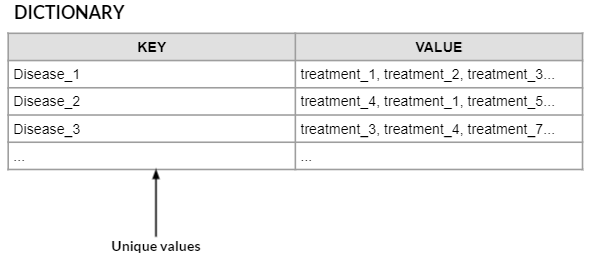

We can use the logic to create a find out the predicted treatements against each disease in the test dataset, which we used earlier for entire corpus

In [152]:
# Set up a loop to get record number, the tagged disease and the treatments in the record for test database. 
size = len(X_test)
test_treat_database = []

for i in range(size):
  for x, y in zip(y_pred[i], [x[0].split("=")[1] for x in X_test[i]]):
    if x == 'D' or x == 'T':
      test_treat_database.append((i,y, x))
      #print(y,i)
      #print("%s %s (%s)" % (i, y, x))
print(test_treat_database)

[(5, 'macrosomic', 'D'), (5, 'infants', 'D'), (5, 'in', 'D'), (5, 'gestational', 'D'), (5, 'diabetes', 'D'), (5, 'cases', 'D'), (5, 'good', 'T'), (5, 'glycemic', 'T'), (5, 'control', 'T'), (12, 'trisomy', 'T'), (12, 'nonimmune', 'D'), (12, 'hydrops', 'D'), (12, 'fetalis', 'D'), (13, 'preeclampsia', 'D'), (15, 'severe', 'D'), (15, 'preeclampsia', 'D'), (20, 'asymmetric', 'D'), (20, 'double', 'D'), (20, 'hemiplegia', 'D'), (21, 'a', 'D'), (21, 'subchorial', 'D'), (21, 'placental', 'D'), (21, 'hematoma', 'D'), (21, 'reversible', 'D'), (21, 'nonimmune', 'D'), (21, 'hydrops', 'D'), (21, 'fetalis', 'D'), (27, 'cancer', 'D'), (29, 'breast', 'D'), (29, 'cancer', 'D'), (29, 'breast', 'D'), (29, 'cancer', 'D'), (29, 'ovarian', 'D'), (29, 'cancer', 'D'), (33, 'prostate', 'D'), (33, 'cancer', 'D'), (34, 'prostate', 'D'), (34, 'cancers', 'D'), (36, 'hereditary', 'D'), (36, 'prostate', 'D'), (36, 'cancer', 'D'), (37, 'prostate', 'D'), (37, 'cancer', 'D'), (39, 'multiple', 'D'), (39, 'sclerosis', 'D'

- We can make use of function - getDiseaseAndTreatment to get the mapping of diseases and treatments 

In [188]:
df_test = getDiseaseAndTreatment(test_treat_database)
df_test

ner_tag,sent_code,Disease,Treatments
0,5,macrosomic infants in gestational diabetes cases,good glycemic control
1,12,nonimmune hydrops fetalis,trisomy
13,46,cancer hereditary retinoblastoma,radiotherapy
16,61,epilepsy adhd,methylphenidate
20,71,unstable angina or non-q-wave myocardial infarction,roxithromycin
...,...,...,...
463,1042,hepatic metastases from colorectal cancer,hepatic arterial infusion of chemotherapy after resection
467,1046,stable asthma,aerosolized salbutamol
469,1048,poliomyelitis,live oral poliovirus vaccines
471,1050,chronic renal failure,epoetin


- We can try to search for common disease to verify our database

In [189]:
df_test.loc[df_test['Disease'].str.contains('diabetes')]

ner_tag,sent_code,Disease,Treatments
0,5,macrosomic infants in gestational diabetes cases,good glycemic control
439,1013,diabetes mellitus,troglitazone


- We will be creating the Dictionary with unique diseases and thier corrosponding treatments from predection, therefor we should first remove the duplicated diseases. 

In [190]:
print('Unique Disease count in test database', len(df_test['Disease'].unique()))

Unique Disease count in test database 138


Verifying duplicated records for Diseases in the dataset created from the cfr model prediction.

In [191]:
df_test.loc[df_test['Disease'].duplicated()]

ner_tag,sent_code,Disease,Treatments
61,194,sore throat,antibiotics
102,302,non-obstructive azoospermia,tefna
267,826,colorectal cancer,leucovorin or cisplatin
297,859,lung carcinoma,curative therapy
312,874,small-cell lung cancer,combination chemotherapy
...,...,...,...
420,991,bronchiectasis,current surgical therapy
430,1001,partial seizures,lamotrigine monotherapy
446,1021,multiple sclerosis,intravenous immunoglobulin treatment
454,1029,cancer,matrix metalloproteinase inhibitors


- Remove the duplicated record for diseases

In [192]:
df_test = df_test.loc[~df_test['Disease'].duplicated()]
df_test

ner_tag,sent_code,Disease,Treatments
0,5,macrosomic infants in gestational diabetes cases,good glycemic control
1,12,nonimmune hydrops fetalis,trisomy
13,46,cancer hereditary retinoblastoma,radiotherapy
16,61,epilepsy adhd,methylphenidate
20,71,unstable angina or non-q-wave myocardial infarction,roxithromycin
...,...,...,...
461,1039,severe secondary peritonitis,surgical management
463,1042,hepatic metastases from colorectal cancer,hepatic arterial infusion of chemotherapy after resection
467,1046,stable asthma,aerosolized salbutamol
469,1048,poliomyelitis,live oral poliovirus vaccines


- Convert the dataframes into dictionary

In [193]:
test_treatment_dict = df_test.set_index('Disease')['Treatments'].to_dict()
test_treatment_dict

{'abdominal tuberculosis': 'steroids',
 'acoustic neuroma': 'stereotactic radiosurgery',
 'acute cerebral ischemia': 'antiplatelet therapy',
 'acute migraine treatment': 'sumatriptan',
 'acute myocardial infarction': 'thrombolytic therapy',
 'acute nasopharyngitis': 'antibiotic treatment',
 'acute occlusion of the middle cerebral artery': 'thrombolytic therapy',
 'advanced esophageal cancer': 'adjuvant chemoradiotherapy with cddp',
 'advanced nsclc': 'combination chemotherapy of cisplatin , ifosfamide and irinotecan with rhg-csf support',
 'advanced rectal cancer': 'nerve-sparing surgery',
 'advanced renal cell carcinoma': 'interferon alpha preparations interferon alfa-n1 , interferon alfa-2a , and interferon alfa-2b',
 'advanced stage ( tnm iib-ivb ) mycosis fungoides': 'combination chemotherapy program consisting of bleomycin and methotrexate weekly , doxorubicin every',
 'aom drug-resistant s. pneumoniae': 'amoxicillin remains the antibiotic of choice',
 'asthma': 'fluticasone propi

### Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [194]:
search_key = 'hereditary retinoblastoma'
[value for key, value in treatment_dictionary.items() if search_key in key.lower()]

['radiotherapy']

In [195]:
cols = ['Disease','Treatments']
dft.loc[dft['Disease'].str.contains('hereditary retinoblastoma')][cols]

ner_tag,Disease,Treatments
13,cancer hereditary retinoblastoma,radiotherapy


The Dictionary for Diseases & Treatments predicted by model gave result of ***radiotherapy*** for disease name : ***hereditary retinoblastoma***